# Problem Statement

> Rossmann is a European drug distributor which operates over 3,000 drug stores across seven European countries. Since a lot of drugs come with a short shelf life, that is, they do not have a long expiry date, it becomes imperative for Rossmann to accurately forecast sales at their individual stores. Currently, the forecasting is taken care of by the store managers who are tasked with forecasting daily sales for the next six weeks. 

- As expected, store sales are influenced by many factors, including promotional campaigns, competition, state holidays, seasonality, and locality.
- With thousands of individual managers predicting sales based on their unique circumstances and intuitions, the accuracy of the forecasts is quite varied. 
- Tasked with building a forecasting model to forecast the daily sales for the next six weeks. 
- To help , historial sales data has been provided for 1,115 Rossmann stores.

## Importing Libraries

In [132]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm 

import warnings
warnings.filterwarnings('ignore')

## Data reading

In [133]:
store = pd.read_csv('store.csv')
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [134]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [135]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [136]:
store.Promo2.value_counts()

1    571
0    544
Name: Promo2, dtype: int64

In [137]:
# replacing no promos given by 0
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].replace(np.nan,0).astype(int)
store['Promo2SinceYear'] = store['Promo2SinceYear'].replace(np.nan,0).astype(int)
store['PromoInterval'] = store['PromoInterval'].replace(np.nan,0)

In [138]:
# this means that there is no competition right now !!
store[store['CompetitionDistance'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,0,0,0
621,622,a,c,NaN,NaN,NaN,0,0,0,0
878,879,d,a,NaN,NaN,NaN,1,5,2013,"Feb,May,Aug,Nov"


In [139]:
# filling nan with 0 and mode values

store['CompetitionDistance'] = store['CompetitionDistance'].replace(np.nan,0).astype(int)
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode()[0]).astype(int)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode()[0]).astype(int)

In [140]:
store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [141]:
# the issue here is that if Competition distance = o i.e., there is no stores near by 
# but the competition month and year is not equals to 0

store[store['CompetitionDistance']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,0,9,2013,0,0,0,0
621,622,a,c,0,9,2013,0,0,0,0
878,879,d,a,0,9,2013,1,5,2013,"Feb,May,Aug,Nov"


In [142]:
# Doing competition month and year = 0

store.loc[store.CompetitionDistance==0, 'CompetitionOpenSinceMonth'] = 0
store.loc[store.CompetitionDistance==0, 'CompetitionOpenSinceYear'] = 0

In [143]:
# now the issue is resolved

store[store['CompetitionDistance']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,0,0,0,0,0,0,0
621,622,a,c,0,0,0,0,0,0,0
878,879,d,a,0,0,0,1,5,2013,"Feb,May,Aug,Nov"


In [144]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,0,0,0
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,0,0,0
4,5,a,a,29910,4,2015,0,0,0,0


In [145]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

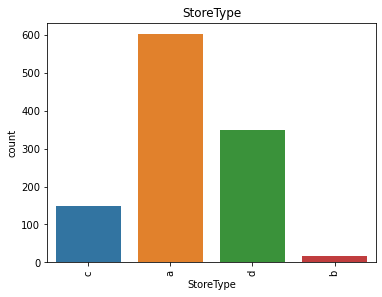

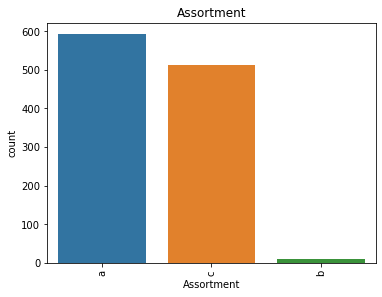

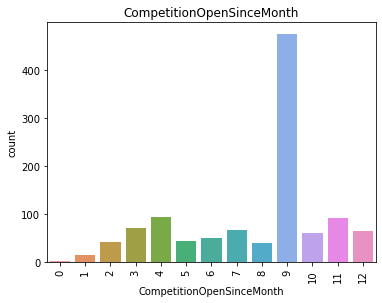

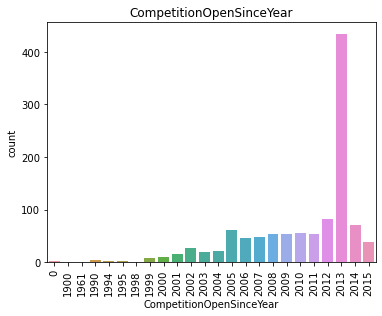

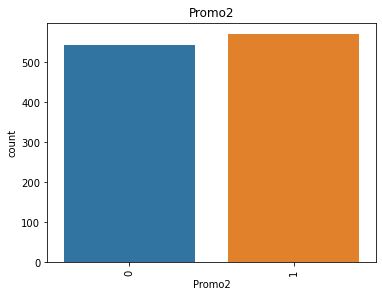

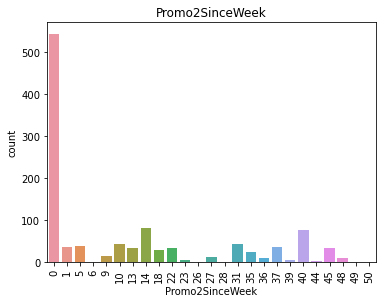

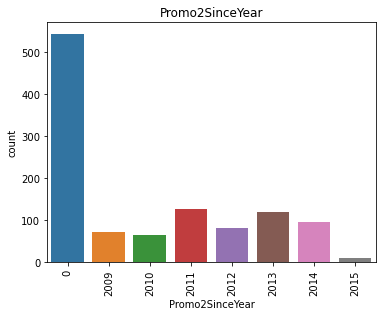

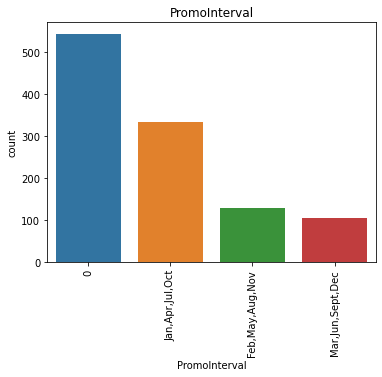

In [146]:
# compairing different categories with  count
cat_cols = ['StoreType', 'Assortment','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
cat_shape = len(cat_cols)

for i in cat_cols:
    plt.figure(figsize=(20,15))
    plt.subplot(3,3,cat_shape+1)
    sns.countplot(store[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

### Inferences

1. StoreType = a is maximum among others
2. Majority of assortments are 'a'
3. Maximum competitions are opened in the month of september or 9
4. MAximum competitiors opened their store in the year 2013
5. 48% stores don't have promo2

In [147]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [148]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [149]:
# parsing date time info
train_df.Date = pd.to_datetime(train_df.Date, format='%Y-%m-%d')
train_df = train_df.set_index('Date')

In [150]:
train_df.StateHoliday.unique() 

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [151]:
train_df.StateHoliday = train_df.StateHoliday.replace('0',0)

In [152]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [153]:
train_df.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

## We will analyze only those entries when the store is 'open' as it is obvious that if store is close then sales = 0

In [154]:
train_open = train_df[train_df.Open==1]
train_open.shape

(844392, 8)

In [155]:
train_open.head(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1


In [156]:
train_open.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

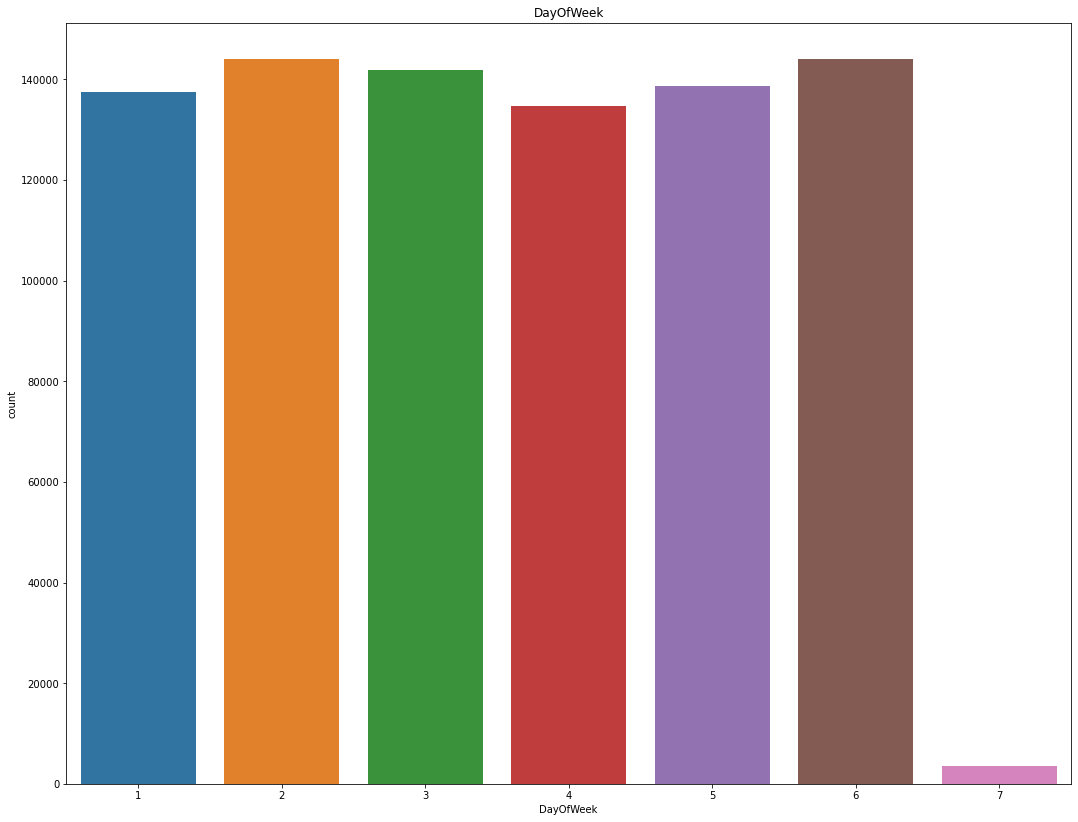

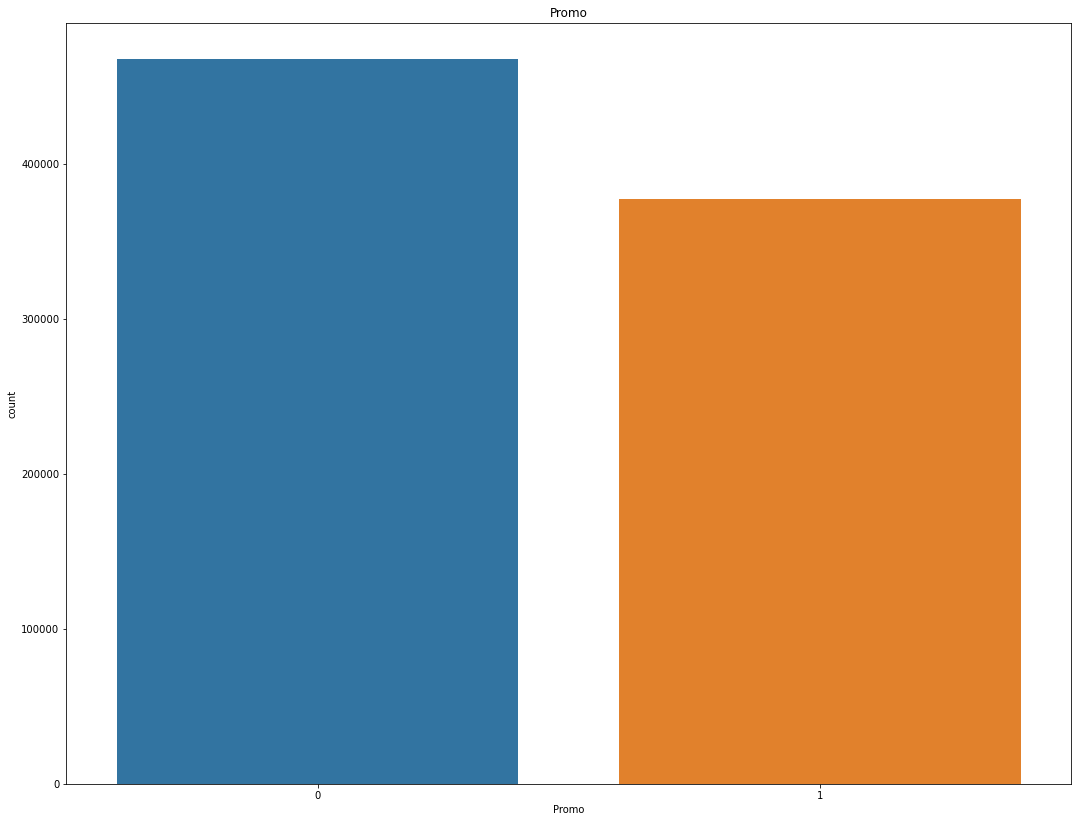

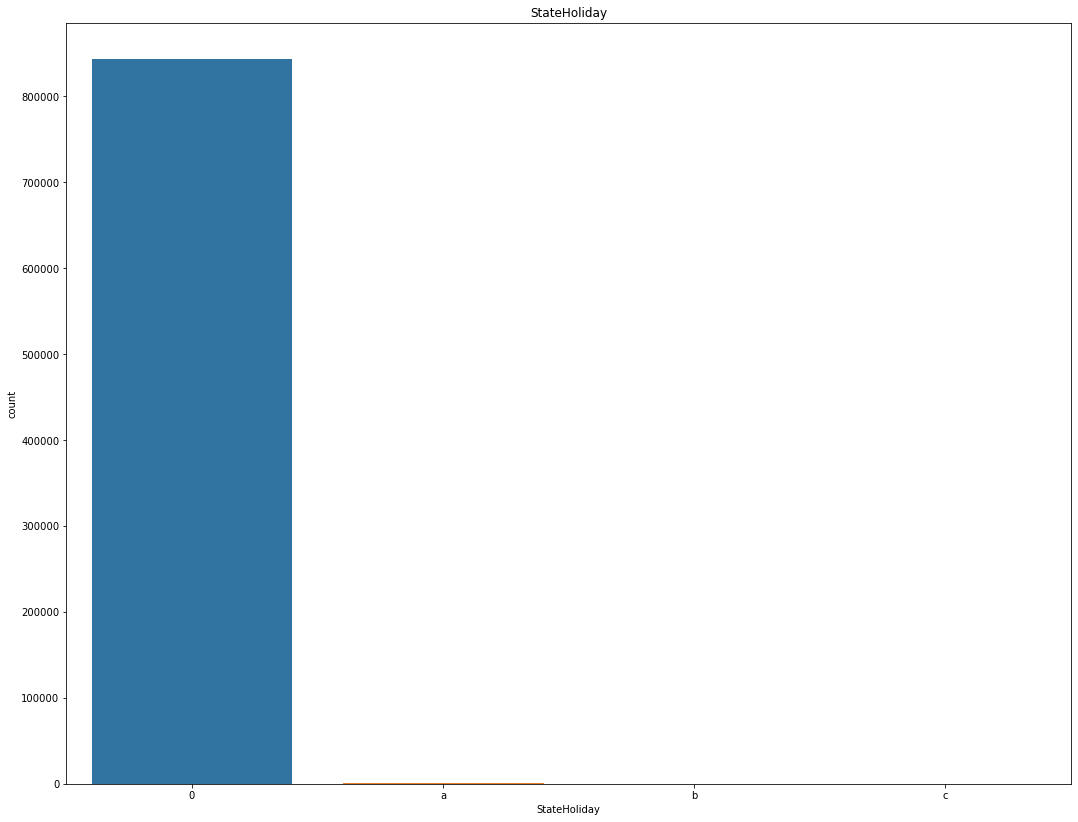

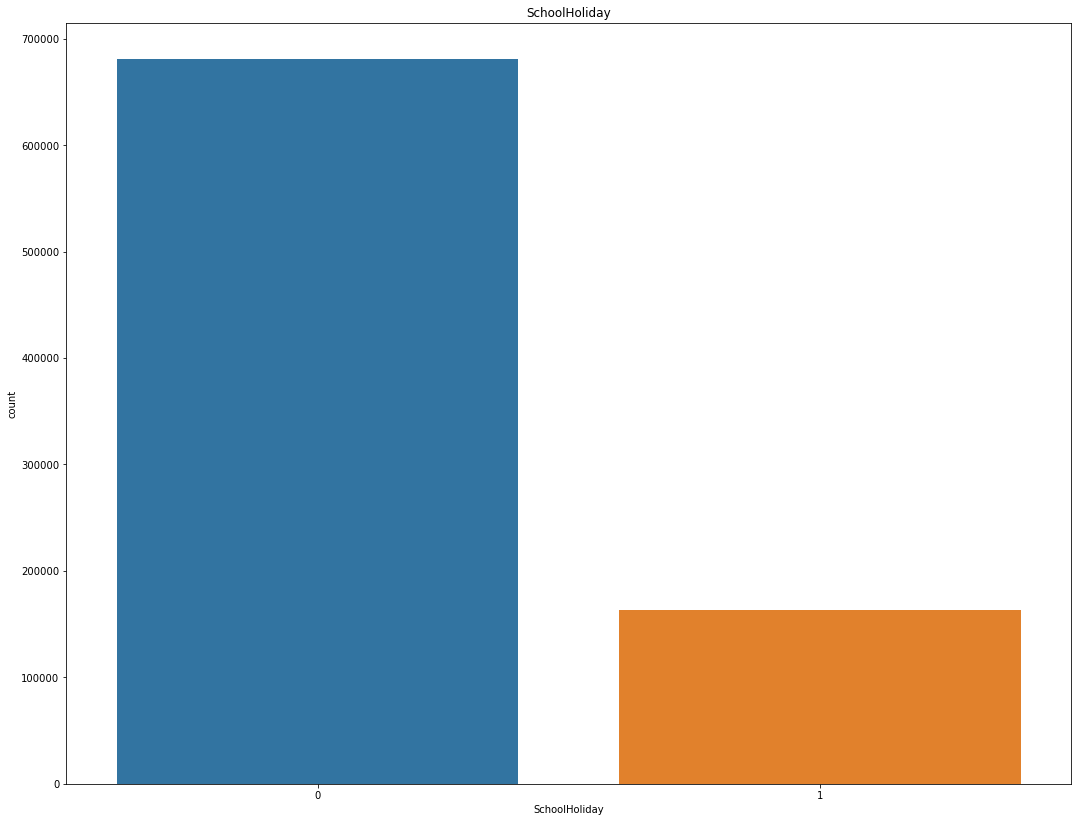

In [157]:
# plot for various variables affecting sales
cat_col_train = ['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday']
for i in cat_col_train:
    sns.countplot(train_open[i])
    plt.title(i)
    plt.show()

### Inferences
1. All days of the week have almost equal sales
2. Mostly the store is open
3. Promotions are less active

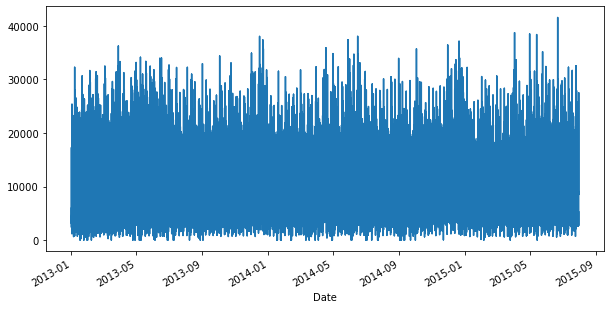

In [158]:
# sales plot
train_open.Sales.plot(figsize=(10,5))
plt.show()

# Outlier Detection at 99 Percentile and Dropping them

In [159]:
# detecting outliers
train_open.describe(percentiles=[0.90,0.95,0.99])

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.0,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,1.0,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.0,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000
90%,1004.000000,6.000000,10771.000000,1177.000000,1.0,1.000000,1.000000
95%,1060.000000,6.000000,12668.000000,1440.000000,1.0,1.000000,1.000000
99%,1104.000000,6.000000,17789.000000,2415.000000,1.0,1.000000,1.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000


In [160]:
train_open.shape

(844392, 8)

In [161]:
train_open = train_open[~(train_open.Sales > 17789)]
train_open.shape

(835949, 8)

In [162]:
train_open = train_open[~(train_open.Customers > 2415)]
train_open.shape

(831626, 8)

In [163]:
844392 - 831626

12766

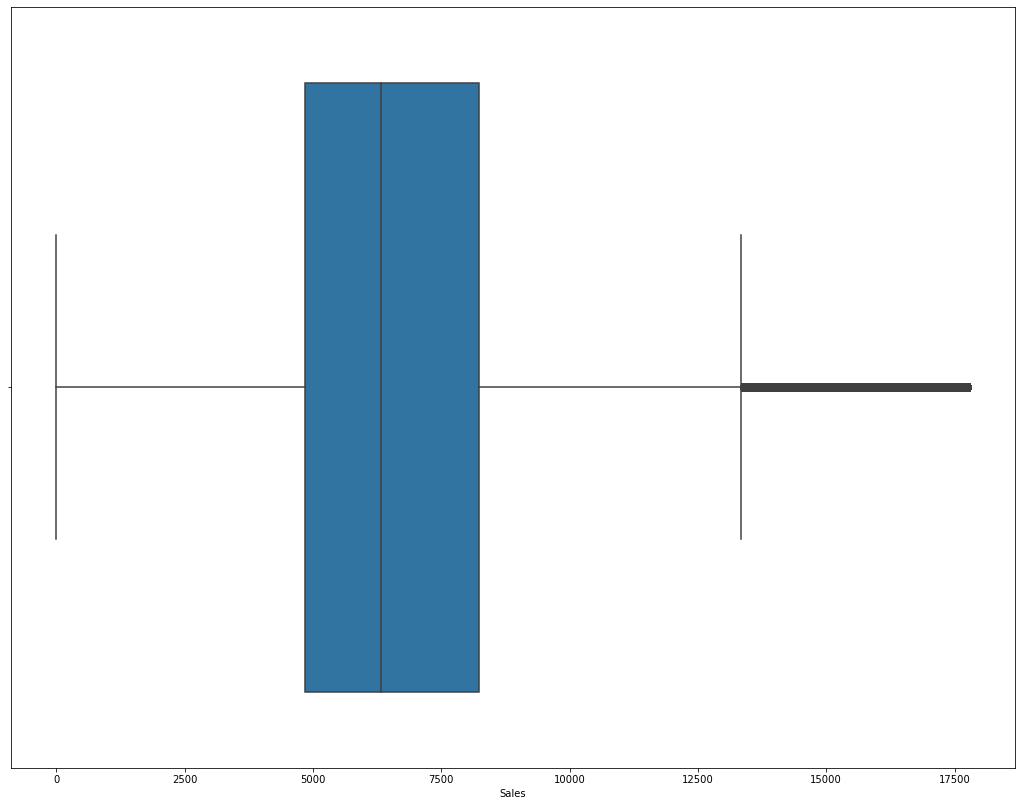

In [164]:
# after outlier treatment
sns.boxplot(train_open.Sales)
plt.show()

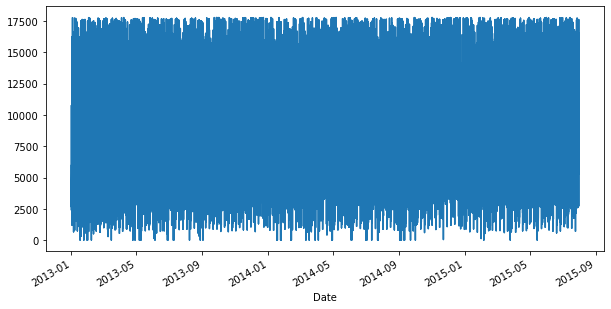

In [165]:
train_open.Sales.plot(figsize=(10,5))
plt.show()

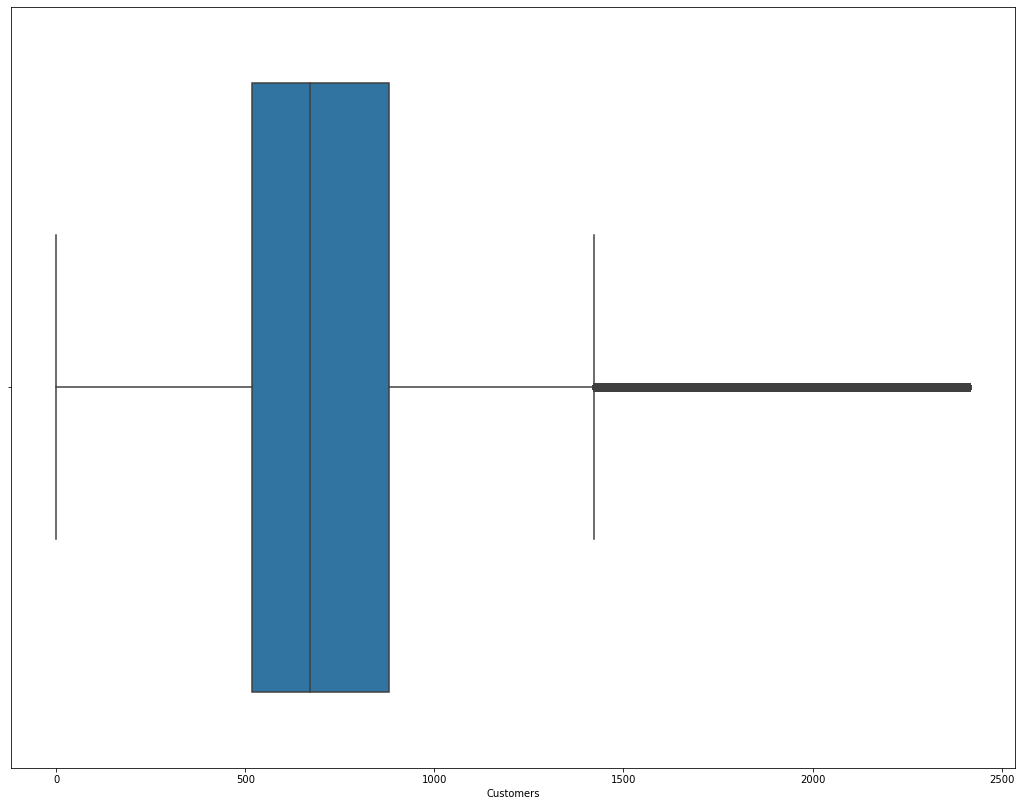

In [166]:
# after outlier treatment
sns.boxplot(train_open.Customers)
plt.show()

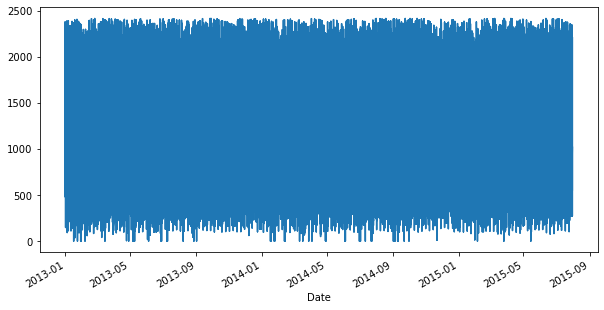

In [167]:
train_open.Customers.plot(figsize=(10,5))
plt.show()

In [168]:
#resetting the index 
train_open = train_open.reset_index()
train_open.head(2)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2015-07-31,1,5,5263,555,1,1,0,1
1,2015-07-31,2,5,6064,625,1,1,0,1


In [169]:
# merging both the datasets
merged_df = train_open.merge(right = store, on='Store', how='inner')
merged_df.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015-07-31,1,5,5263,555,1,1,0,1,c,a,1270,9,2008,0,0,0,0
1,2015-07-30,1,4,5020,546,1,1,0,1,c,a,1270,9,2008,0,0,0,0
2,2015-07-29,1,3,4782,523,1,1,0,1,c,a,1270,9,2008,0,0,0,0
3,2015-07-28,1,2,5011,560,1,1,0,1,c,a,1270,9,2008,0,0,0,0
4,2015-07-27,1,1,6102,612,1,1,0,1,c,a,1270,9,2008,0,0,0,0


In [170]:
merged_df.shape

(831626, 18)

In [171]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831626 entries, 0 to 831625
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date                       831626 non-null  datetime64[ns]
 1   Store                      831626 non-null  int64         
 2   DayOfWeek                  831626 non-null  int64         
 3   Sales                      831626 non-null  int64         
 4   Customers                  831626 non-null  int64         
 5   Open                       831626 non-null  int64         
 6   Promo                      831626 non-null  int64         
 7   StateHoliday               831626 non-null  object        
 8   SchoolHoliday              831626 non-null  int64         
 9   StoreType                  831626 non-null  object        
 10  Assortment                 831626 non-null  object        
 11  CompetitionDistance        831626 non-null  int32   

In [172]:
# null check
merged_df.isna().sum()

Date                         0
Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

## Bi-Variate Analysis

In [173]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831626 entries, 0 to 831625
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date                       831626 non-null  datetime64[ns]
 1   Store                      831626 non-null  int64         
 2   DayOfWeek                  831626 non-null  int64         
 3   Sales                      831626 non-null  int64         
 4   Customers                  831626 non-null  int64         
 5   Open                       831626 non-null  int64         
 6   Promo                      831626 non-null  int64         
 7   StateHoliday               831626 non-null  object        
 8   SchoolHoliday              831626 non-null  int64         
 9   StoreType                  831626 non-null  object        
 10  Assortment                 831626 non-null  object        
 11  CompetitionDistance        831626 non-null  int32   

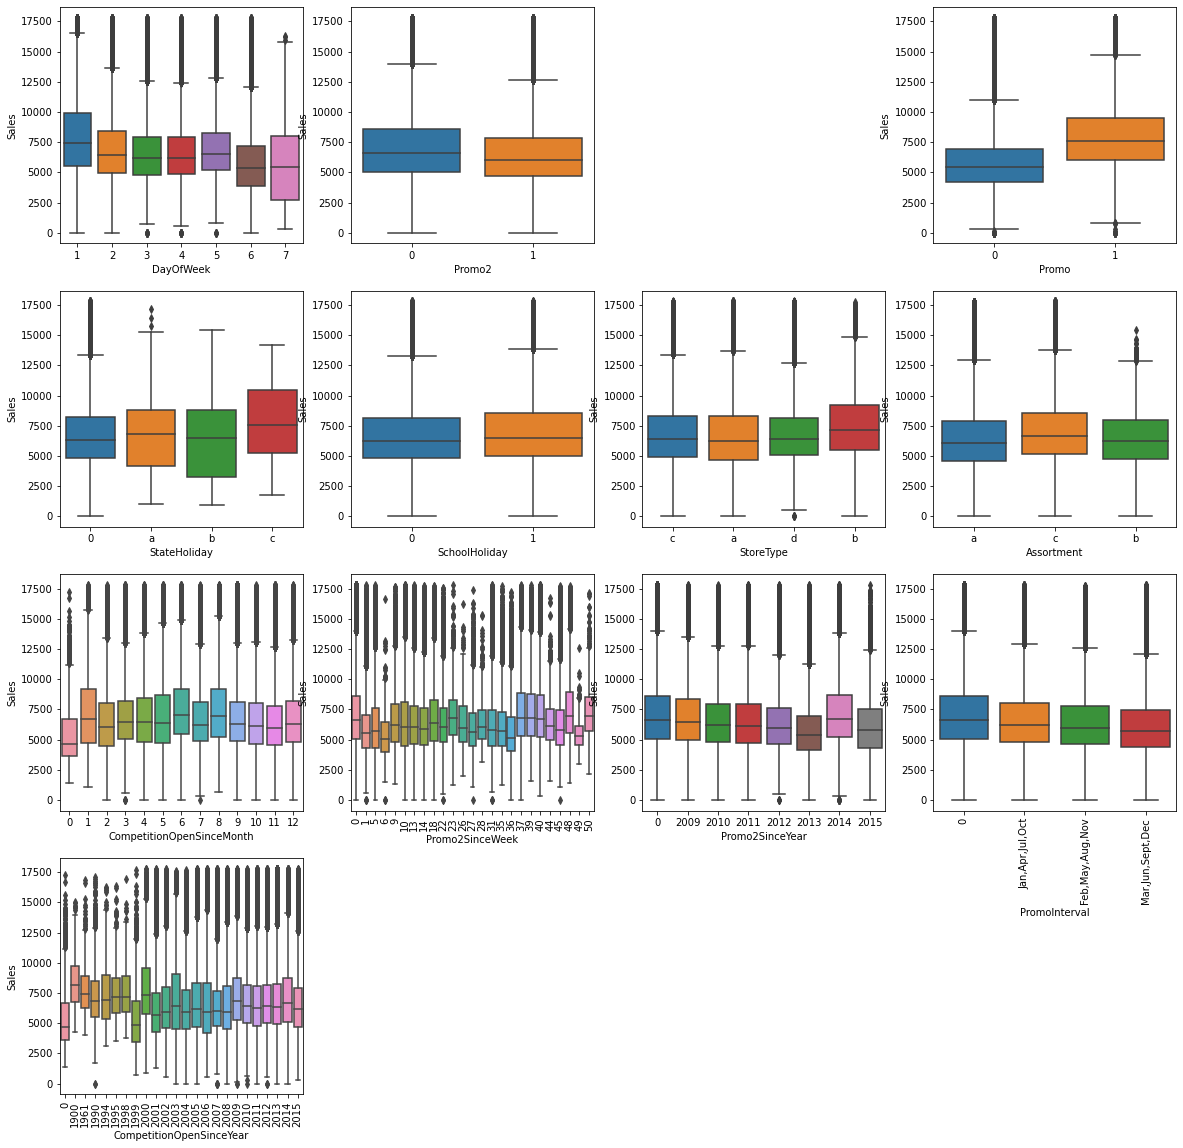

In [174]:
# box-plot creation for variious variables w.r.t sales
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.boxplot(x = merged_df.DayOfWeek, y = merged_df.Sales)

plt.subplot(4,4,2)
sns.boxplot(x = merged_df.Promo2, y = merged_df.Sales)

plt.subplot(4,4,4)
sns.boxplot(x = merged_df.Promo, y = merged_df.Sales)

plt.subplot(4,4,5)
sns.boxplot(x = merged_df.StateHoliday, y = merged_df.Sales)

plt.subplot(4,4,6)
sns.boxplot(x = merged_df.SchoolHoliday, y = merged_df.Sales)

plt.subplot(4,4,7)
sns.boxplot(x = merged_df.StoreType, y = merged_df.Sales)

plt.subplot(4,4,8)
sns.boxplot(x = merged_df.Assortment, y = merged_df.Sales)

plt.subplot(4,4,9)
sns.boxplot(x = merged_df.CompetitionOpenSinceMonth, y = merged_df.Sales)

plt.subplot(4,4,10)
sns.boxplot(x = merged_df.Promo2SinceWeek, y = merged_df.Sales)
plt.xticks(rotation=90)

plt.subplot(4,4,11)
sns.boxplot(x = merged_df.Promo2SinceYear, y = merged_df.Sales)

plt.subplot(4,4,12)
sns.boxplot(x = merged_df.PromoInterval, y = merged_df.Sales)
plt.xticks(rotation=90)

plt.subplot(4,4,13)
sns.boxplot(x = merged_df.CompetitionOpenSinceYear, y = merged_df.Sales)

plt.xticks(rotation=90)
plt.show()

### There is no effect of the following columns over 'Sales' as you can see in the above plots

1. Promo2
2. SchoolHoliday
3. Promo2SinceWeek
4. Promo2SinceYear
5. PromoInterval
6. StoreType  
7. Open

In [175]:
merged_df.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

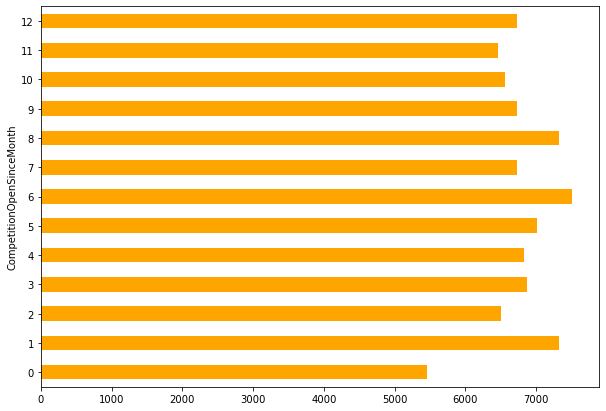

In [176]:
# trend/seasonality search
merged_df.groupby(['CompetitionOpenSinceMonth'])['Sales'].mean().plot.barh(figsize=(10,7), color='orange')
plt.show()

### The sales is maximum when in 6th, 1st and 8th month of the competition opened. While it may not be an insight but this may tell us one thing that the diseases in these month are increased as Season Changes in these months

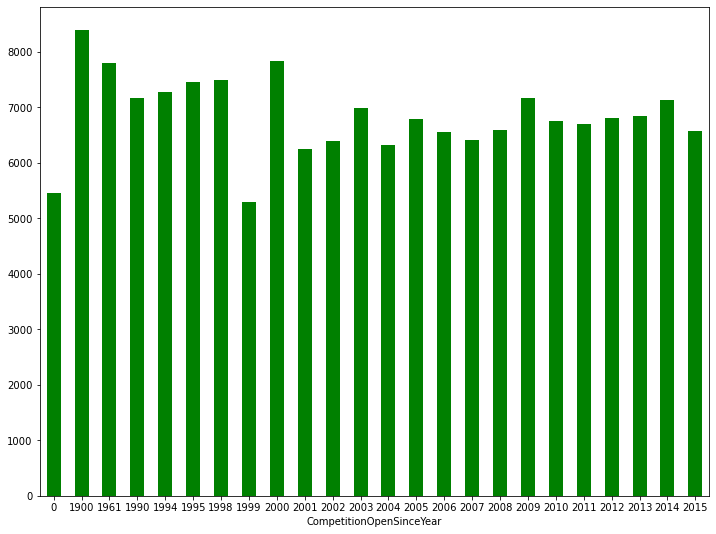

In [177]:
# trend/seasonality search

merged_df.groupby(['CompetitionOpenSinceYear'])['Sales'].mean().plot.bar(figsize=(12,9), color='g')
plt.xticks(rotation=360)
plt.show()

In [178]:
merged_df.groupby(['CompetitionDistance'])['Sales'].mean().describe(percentiles=[0.75,0.90,0.95,0.99])

count      655.000000
mean      6752.564589
std       1658.082762
min       2703.736573
50%       6672.844388
75%       7714.051348
90%       8848.243300
95%       9633.678315
99%      11419.144959
max      15679.356808
Name: Sales, dtype: float64

### Currently we will drop 3 more columns as there is not much influence on the Sales

1. CompetitionOpenSinceMonth
2. CompetitionOpenSinceYear
3. CompetitionDistance

### If, you think that dropping them will decrease the accuracy then try to add them in df and then calculate accuracy

## Final decision of dropping the following columns
1. Promo2
2. SchoolHoliday
3. Promo2SinceWeek
4. Promo2SinceYear
5. PromoInterval
6. StoreType     **#We can't drop this because this is the model of the business**
7. CompetitionOpenSinceMonth
8. CompetitionOpenSinceYear
9. CompetitionDistance
10. Open


## Feature-Engineering

In [179]:
merged_df.shape

(831626, 18)

In [180]:
# dropping unnecessary columns
merged_df = merged_df.drop(['Promo2','SchoolHoliday','Promo2SinceWeek','Promo2SinceYear','PromoInterval',
                           'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'CompetitionDistance', 'Open'], axis=1)
merged_df.shape

(831626, 9)

In [181]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831626 entries, 0 to 831625
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          831626 non-null  datetime64[ns]
 1   Store         831626 non-null  int64         
 2   DayOfWeek     831626 non-null  int64         
 3   Sales         831626 non-null  int64         
 4   Customers     831626 non-null  int64         
 5   Promo         831626 non-null  int64         
 6   StateHoliday  831626 non-null  object        
 7   StoreType     831626 non-null  object        
 8   Assortment    831626 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 95.7+ MB


### Dummy variable creation

In [182]:
dummy1 = pd.get_dummies(merged_df.DayOfWeek, drop_first=True, prefix= 'DayOfWeek')
dummy1.head(2)

,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,0,0,0,1,0,0
1,0,0,1,0,0,0


In [183]:
dummy2 = pd.get_dummies(merged_df.StoreType, drop_first=True, prefix='StoreType')
dummy2.head(2)

,StoreType_b,StoreType_c,StoreType_d
0,0,1,0
1,0,1,0


In [184]:
dummy3 = pd.get_dummies(merged_df.Assortment, drop_first=True, prefix='Assortment')
dummy3.head(2)

,Assortment_b,Assortment_c
0,0,0
1,0,0


In [185]:
dummy4 = pd.get_dummies(merged_df.StateHoliday, drop_first=True, prefix='StateHoliday')
dummy4.head(2)

,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,0,0,0
1,0,0,0


In [186]:
#merging the dummies
merged_df2 = pd.concat([merged_df, dummy1, dummy2, dummy3,dummy4], axis=1)
merged_df2 = merged_df2.drop(['StoreType','DayOfWeek','Assortment', 'StateHoliday'], axis=1)
merged_df2.shape

(831626, 19)

In [187]:
merged_df2 = merged_df2.set_index('Date')
merged_df2.head(2)

,Store,Sales,Customers,Promo,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,StateHoliday_a,StateHoliday_b,StateHoliday_c
Date,,,,,,,,,,,,,,,,,,
2015-07-31,1,5263,555,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2015-07-30,1,5020,546,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0


# Time-Series Analysis

In [188]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 831626 entries, 2015-07-31 to 2013-12-24
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Store           831626 non-null  int64
 1   Sales           831626 non-null  int64
 2   Customers       831626 non-null  int64
 3   Promo           831626 non-null  int64
 4   DayOfWeek_2     831626 non-null  uint8
 5   DayOfWeek_3     831626 non-null  uint8
 6   DayOfWeek_4     831626 non-null  uint8
 7   DayOfWeek_5     831626 non-null  uint8
 8   DayOfWeek_6     831626 non-null  uint8
 9   DayOfWeek_7     831626 non-null  uint8
 10  StoreType_b     831626 non-null  uint8
 11  StoreType_c     831626 non-null  uint8
 12  StoreType_d     831626 non-null  uint8
 13  Assortment_b    831626 non-null  uint8
 14  Assortment_c    831626 non-null  uint8
 15  StateHoliday_a  831626 non-null  uint8
 16  StateHoliday_b  831626 non-null  uint8
 17  StateHoliday_c  831626 non-null 

# As, both mean and median values are almost similar so their wouldn't be much diff b/w both

In [189]:
merged_df2.columns

Index(['Store', 'Sales', 'Customers', 'Promo', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c'],
      dtype='object')

In [190]:
# val_count
for i in merged_df2.columns[3:]:
    print(merged_df2[i].value_counts(normalize=True)*100)
    print('*~'*20)

0    55.595544
1    44.404456
Name: Promo, dtype: float64
*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~
0    82.938364
1    17.061636
Name: DayOfWeek_2, dtype: float64
*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~
0    83.128594
1    16.871406
Name: DayOfWeek_3, dtype: float64
*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~
0    83.998817
1    16.001183
Name: DayOfWeek_4, dtype: float64
*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~
0    83.537552
1    16.462448
Name: DayOfWeek_5, dtype: float64
*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~
0    82.846857
1    17.153143
Name: DayOfWeek_6, dtype: float64
*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~
0    99.658019
1     0.341981
Name: DayOfWeek_7, dtype: float64
*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~
0    98.769639
1     1.230361
Name: StoreType_b, dtype: float64
*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~
0    86.501384
1    13.498616
Name: StoreType_c, dtype: float64
*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~
0    68.982211
1    31.017789
Name: StoreType_d, dtype: float

In [191]:
merged_df2.head(2)

,Store,Sales,Customers,Promo,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,StateHoliday_a,StateHoliday_b,StateHoliday_c
Date,,,,,,,,,,,,,,,,,,
2015-07-31,1,5263,555,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2015-07-30,1,5020,546,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [192]:
# aggrigating the data for model building
train_grouped = merged_df2.groupby(['Date']).agg({'Sales': 'mean',
                                           'Customers':'mean',
                                           'Promo': 'sum',
                                           'StateHoliday_a':'mean','StateHoliday_b':'mean','StateHoliday_c':'mean',
                                           'StoreType_b' : 'mean','StoreType_c' : 'mean','StoreType_d' : 'mean',
                                           'Assortment_b':'mean', 'Assortment_c':'mean',   
                                           'DayOfWeek_2':'mean','DayOfWeek_3':'mean',
                                           'DayOfWeek_4':'mean','DayOfWeek_5':'mean',
                                           'DayOfWeek_6':'mean','DayOfWeek_7':'mean'})
train_grouped.head(2)

# As, some columns have only 2 values i.e., 0 or 1 so, it is the same thing to take mean or sum
# both will give you same result so, don't confuse b/w mean or sum

,Sales,Customers,Promo,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Date,,,,,,,,,,,,,,,,,
2013-01-01,4998.000000,1038.500000,0,1.0,0.0,0.0,0.937500,0.000000,0.000000,0.562500,0.125000,1.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,6132.214545,732.165455,0,0.0,0.0,0.0,0.011818,0.132727,0.313636,0.007273,0.457273,0.0,1.0,0.0,0.0,0.0,0.0


In [193]:
# importing libraries
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 14

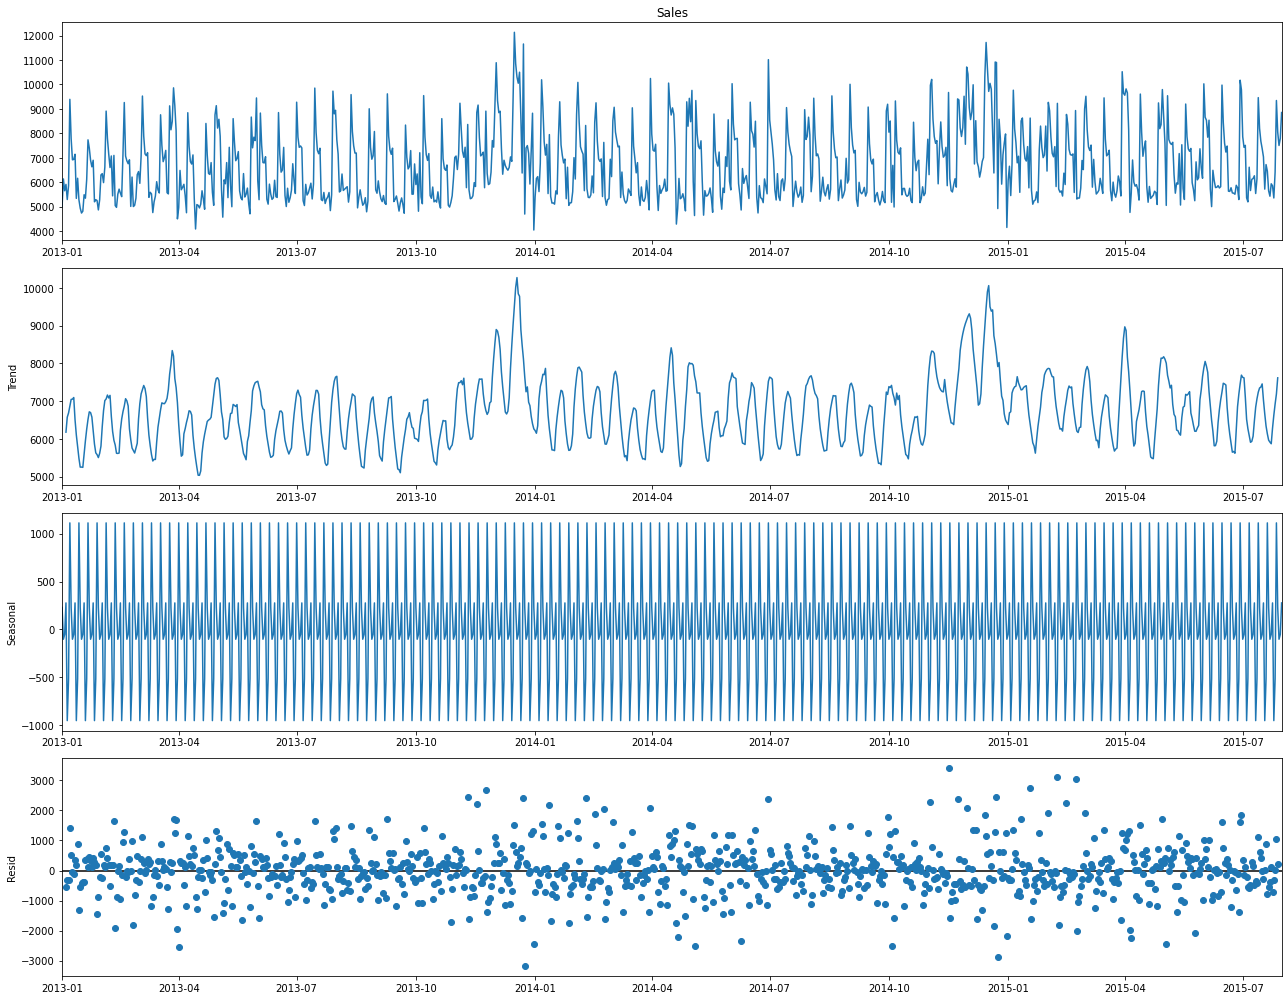

In [194]:
# seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(train_grouped.Sales, model='additive') 
fig = decomposition.plot()
plt.show()

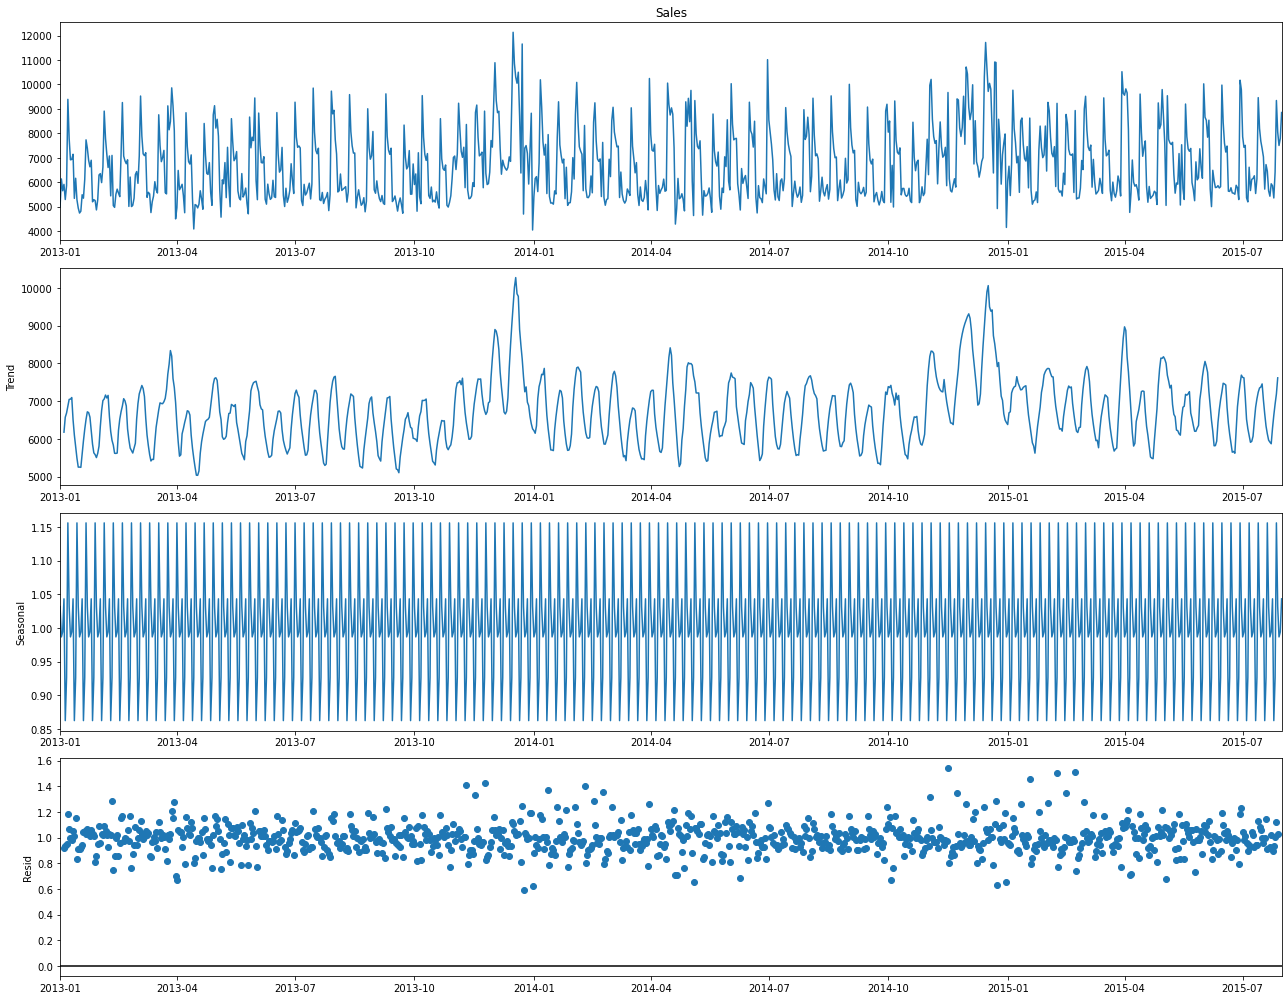

In [195]:
# seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(train_grouped.Sales, model='multiplicative') 
fig = decomposition.plot()
plt.show()

## Making copy of the data 

In [196]:
trainy = train_grouped.copy()

# Checking stationarity 

## 1. Sales column

In [197]:
# importing stationarity tests
from statsmodels.tsa.stattools import adfuller, kpss

In [198]:
trainy.shape

(942, 17)

In [199]:
# adfuller test
adf_test = adfuller(trainy.Sales)
print('ADF Statistics :- ', adf_test[0])
print('Critical Value @ 0.05:- ', adf_test[4]['5%'])
print('p-value:- ', adf_test[1])

if adf_test[0]<adf_test[4]['5%'] and adf_test[1]<0.05:
    print("Series is Stationary")
else:
    print("Series is not Stationary")

ADF Statistics :-  -4.584875354682701
Critical Value @ 0.05:-  -2.8646798473884134
p-value:-  0.00013771989697271115
Series is Stationary


**`Always ADF and KPSS statistics must be lower than their respective Critical Values at 5%`**

In [200]:
#kpss test
kpss_test = kpss(trainy.Sales)
print('KPSS Statistics :- ', kpss_test[0])
print('Critical Value @ 0.05:- ', kpss_test[3]['5%'])
print('p-value:- ', kpss_test[1])

if kpss_test[0]<kpss_test[3]['5%'] and kpss_test[1]<0.05:
    print("Series is Stationary")
else:
    print("Series is not Stationary")

KPSS Statistics :-  0.7266339628349309
Critical Value @ 0.05:-  0.463
p-value:-  0.011124185196824465
Series is not Stationary


<h3 style = "color : Brown"> The issue here is that the **ADF test** is showing the series is stationary but **KPSS Test** is showing that the series is not Stationary. So, there are many issues related to this. Check them out below:-  </h3 >

- **Case 1:** Both tests conclude that the given series is stationary – The series is stationary
- **Case 2:** Both tests conclude that the given series is non-stationary – The series is non-stationary
- **Case 3:** ADF concludes non-stationary, and KPSS concludes stationary – The series is trend stationary. To make the series strictly stationary, the trend needs to be removed in this case. Then the detrended series is checked for stationarity. **Detrend can be done using differencing.**
- **Case 4:** ADF concludes stationary, and KPSS concludes non-stationary – The series is difference stationary. Differencing is to be used to make series stationary. Then the differenced series is checked for stationarity.

# Non-Stationary to Stationary 

### 1. Differencing

In [201]:
trainy.Sales.head()

Date
2013-01-01    4998.000000
2013-01-02    6132.214545
2013-01-03    5648.392015
2013-01-04    5908.981818
2013-01-05    5289.219290
Name: Sales, dtype: float64

In [202]:
#differencing the series
sales_diff = pd.Series(trainy.Sales.diff(), index = trainy.index)
sales_diff.dropna(inplace=True)
sales_diff.head()

Date
2013-01-02    1134.214545
2013-01-03    -483.822531
2013-01-04     260.589804
2013-01-05    -619.762528
2013-01-06     570.780710
Name: Sales, dtype: float64

In [203]:
# adf test
adf_test = adfuller(sales_diff)
print('ADF Statistics :- ', adf_test[0])
print('Critical Value @ 0.05:- ', adf_test[4]['5%'])
print('p-value:- ', adf_test[1])

if adf_test[0]<adf_test[4]['5%'] and adf_test[1]<0.05:
    print("Series is Stationary")
else:
    print("Series is not Stationary")

ADF Statistics :-  -12.098351631041394
Critical Value @ 0.05:-  -2.8646832620852853
p-value:-  2.0456054451288824e-22
Series is Stationary


In [204]:
# kpss test
kpss_test2 = kpss(sales_diff)
print('KPSS Statistics :- ', kpss_test2[0])
print('Critical Value @ 0.05:- ', kpss_test2[3]['5%'])
print('p-value:- ', kpss_test2[1])

KPSS Statistics :-  0.014265288533600184
Critical Value @ 0.05:-  0.463
p-value:-  0.1


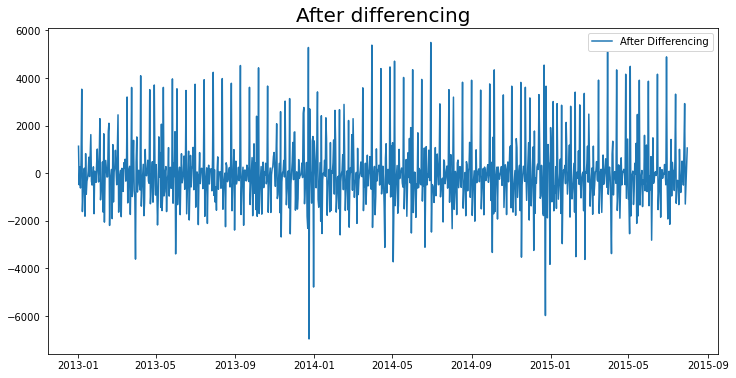

In [205]:
# diff plot
plt.figure(figsize=[12,6])
plt.plot(sales_diff, label='After Differencing')
plt.title('After differencing', size=20)
plt.legend(loc = 'best')
plt.show()

### Seeing above results we can say that the series is now converted to stationary so we will not do differencing 

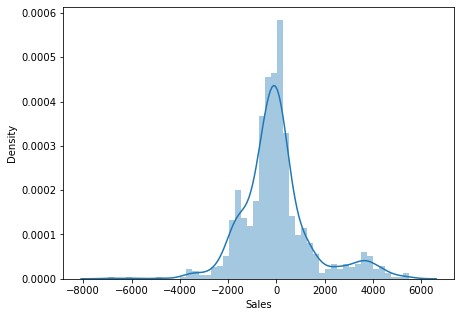

In [206]:
#dist plot
plt.figure(figsize=(7,5))
sns.distplot(sales_diff)
plt.show()

## 2. Customers Column

In [207]:
#adf test
adf_test = adfuller(trainy.Customers)
print('ADF Statistics :- ', adf_test[0])
print('Critical Value @ 0.05:- ', adf_test[4]['5%'])
print('p-value:- ', adf_test[1])

if adf_test[0]<adf_test[4]['5%'] and adf_test[1]<0.05:
    print("Series is Stationary")
else:
    print("Series is not Stationary")

ADF Statistics :-  -4.936845983238021
Critical Value @ 0.05:-  -2.8646662624723502
p-value:-  2.9550318634820264e-05
Series is Stationary


In [208]:
#kpss test
kpss_test2 = kpss(trainy.Customers)
print('KPSS Statistics :- ', kpss_test2[0])
print('Critical Value @ 0.05:- ', kpss_test2[3]['5%'])
print('p-value:- ', kpss_test2[1])

KPSS Statistics :-  0.2025255869455481
Critical Value @ 0.05:-  0.463
p-value:-  0.1


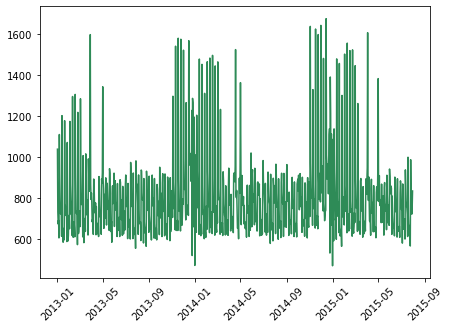

In [209]:
plt.figure(figsize=(7,5))
plt.plot(trainy.Customers, color='seagreen')
plt.xticks(rotation=45)
plt.show()

### **'Customer' Column is  stationary**

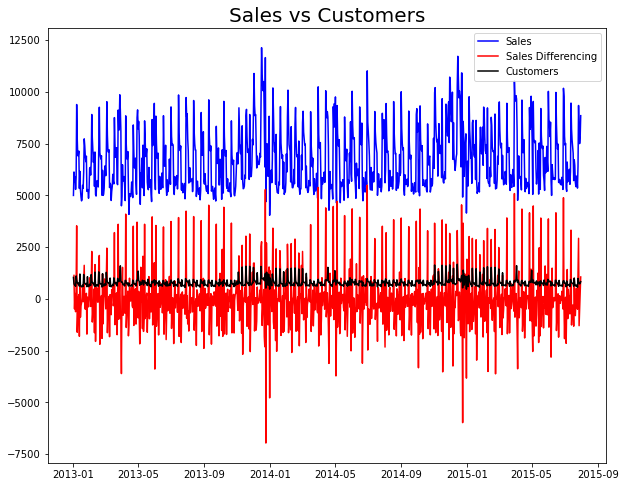

In [210]:
# measuring customers to sales
plt.figure(figsize=(10,8))
plt.plot(trainy.Sales, label='Sales', color='blue')
plt.plot(sales_diff, label='Sales Differencing', color='red')
plt.plot(trainy.Customers, label='Customers', color='black')
plt.legend(loc='best')
plt.title("Sales vs Customers", Size=20)
plt.show()

# ACF & PACF Plot for Sales

In [211]:
#importing acf pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

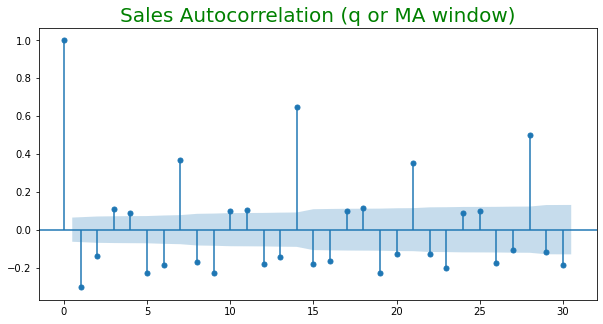

In [212]:
#acf
plt.figure(figsize=[10,5])
plot_acf(sales_diff, ax=plt.gca(), lags=30)
plt.title("Sales Autocorrelation (q or MA window)", size=20, color='green')
plt.show()

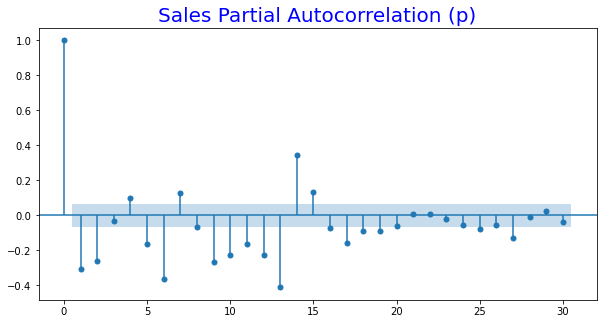

In [213]:
#pacf
plt.figure(figsize=[10,5])
plot_pacf(sales_diff, ax=plt.gca(), lags=30)
plt.title("Sales Partial Autocorrelation (p)", size=20, color='blue')
plt.show()

- **p:- 6**

- **q or MA window:- 1 or 7**

# Train-Test split

- We will take 42-days for test as we have to predict for 6-weeks or 42 days

In [214]:
# Splitting the whole dataframe "train_grouped" 
train_len = 900

train_grouped_df = trainy[:train_len]
test_grouped_df = trainy[train_len:]

print(train_grouped_df.shape)
print(test_grouped_df.shape)

(900, 17)
(42, 17)


In [215]:
sales_diff.shape

(941,)

In [216]:
# splitting the series of sales_boxcox
train_sales_diff = sales_diff[:train_len-1]
test_sales_diff = sales_diff[train_len-1:]

In [217]:
train_sales_diff.head()

Date
2013-01-02    1134.214545
2013-01-03    -483.822531
2013-01-04     260.589804
2013-01-05    -619.762528
2013-01-06     570.780710
Name: Sales, dtype: float64

# ARIMA

In [218]:
# model import
from statsmodels.tsa.arima_model import ARIMA

In [219]:
model = ARIMA(train_sales_diff, order=(6,0,1))
model_fit = model.fit()
print(model_fit.params)

const          1.252678
ar.L1.Sales   -0.663584
ar.L2.Sales   -0.311320
ar.L3.Sales   -0.094106
ar.L4.Sales   -0.059945
ar.L5.Sales   -0.295416
ar.L6.Sales   -0.413851
ma.L1.Sales    0.260601
dtype: float64


In [220]:
# retrieving the series
y_hat_arima = sales_diff.copy()

y_hat_arima['arima_forecast_diff'] = model_fit.predict(sales_diff.index.min(), sales_diff.index.max())

y_hat_arima['arima_forecast'] = y_hat_arima['arima_forecast_diff'].cumsum()

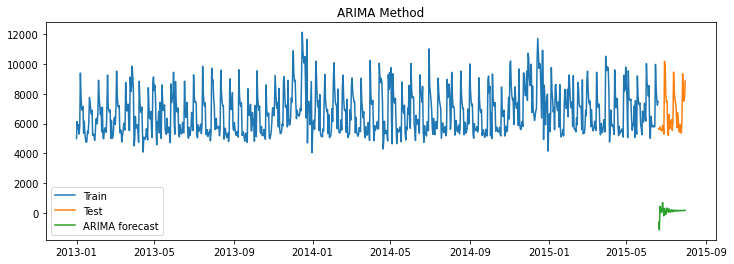

In [221]:
#sales plot
plt.figure(figsize=(12,4))
plt.plot(trainy['Sales'][:train_len], label='Train')
plt.plot(trainy['Sales'][train_len:], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test_grouped_df.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method')
plt.show()

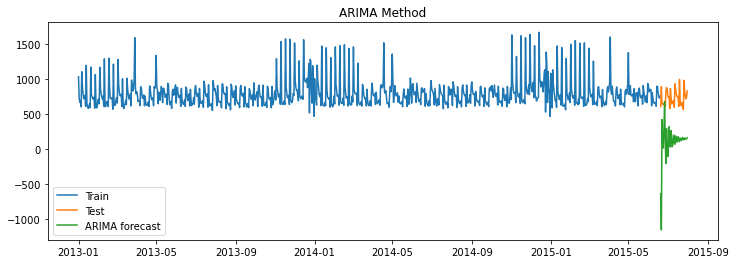

In [222]:
#cust plot
plt.figure(figsize=(12,4))
plt.plot(trainy['Customers'][:train_len], label='Train')
plt.plot(trainy['Customers'][train_len:], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test_grouped_df.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA Method')
plt.show()

In [223]:
#importing computations
from sklearn.metrics import mean_squared_error

In [224]:
#calculating errors
rmse = np.sqrt(mean_squared_error(test_grouped_df['Sales'], y_hat_arima['arima_forecast'][test_grouped_df.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_grouped_df['Sales']-y_hat_arima['arima_forecast'][test_grouped_df.index.min():])/test_grouped_df['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['ARIMA method'], 'RMSE': [rmse],'MAPE': [mape] })
result1 = tempResults[['Method', 'RMSE', 'MAPE']]
result1

,Method,RMSE,MAPE
0,ARIMA method,6726.88,98.62


In [225]:
#calculating errors

rmse_cust = np.sqrt(mean_squared_error(test_grouped_df['Customers'], y_hat_arima['arima_forecast'][test_grouped_df.index.min():])).round(2)
mape_cust = np.round(np.mean(np.abs(test_grouped_df['Customers']-y_hat_arima['arima_forecast'][test_grouped_df.index.min():])/test_grouped_df['Customers'])*100,2)

tempResults_cust = pd.DataFrame({'Method':['ARIMA method'], 'RMSE': [rmse_cust],'MAPE': [mape_cust] })
result1_cust = tempResults_cust[['Method', 'RMSE', 'MAPE']]
result1_cust

,Method,RMSE,MAPE
0,ARIMA method,705.07,85.74


# SARIMA 

In [226]:
# importing seasonal model
from statsmodels.tsa.statespace.sarimax import SARIMAX

- `p` and `q` may either be an integers indicating the AR and MA
- We will take **p=7** and **q=0**

In [227]:
model = SARIMAX(train_sales_diff, order=(6,0,0), seasonal_order=(6,0,0,12))
model_fit = model.fit()
model_fit.params

ar.L1      -4.565467e-01
ar.L2      -1.525861e-01
ar.L3       1.691723e-02
ar.L4      -4.131421e-03
ar.L5      -2.852416e-01
ar.L6      -4.113942e-01
ar.S.L12   -1.156470e-01
ar.S.L24   -1.413861e-01
ar.S.L36    7.736304e-03
ar.S.L48    1.876736e-02
ar.S.L60   -4.467270e-02
ar.S.L72   -1.009744e-01
sigma2      1.540368e+06
dtype: float64

In [228]:
# retrieving the series

y_hat_sarima = sales_diff.copy()

y_hat_sarima['sarima_forecast_diff'] = model_fit.predict(sales_diff.index.min(), sales_diff.index.max())

y_hat_sarima['sarima_forecast'] = y_hat_sarima['sarima_forecast_diff'].cumsum()

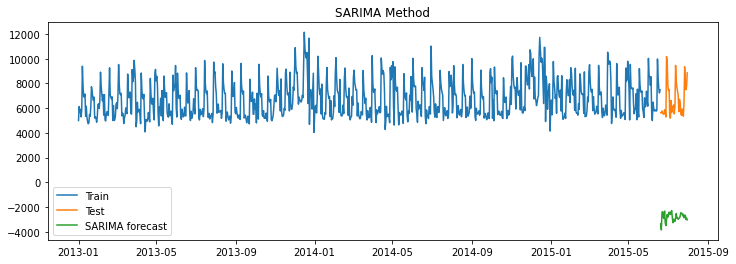

In [229]:
#sales plot
plt.figure(figsize=(12,4))
plt.plot(trainy['Sales'][:train_len], label='Train')
plt.plot(trainy['Sales'][train_len:], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_grouped_df.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('SARIMA Method')
plt.show()

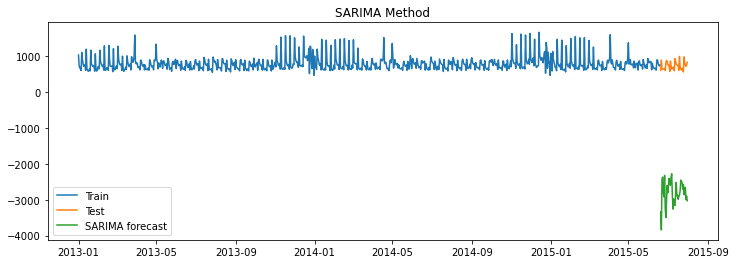

In [230]:
#cust plot
plt.figure(figsize=(12,4))
plt.plot(trainy['Customers'][:train_len], label='Train')
plt.plot(trainy['Customers'][train_len:], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_grouped_df.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('SARIMA Method')
plt.show()

In [231]:
#calculating errors

rmse = np.sqrt(mean_squared_error(test_grouped_df['Sales'], y_hat_sarima['sarima_forecast'][test_grouped_df.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_grouped_df['Sales']-y_hat_sarima['sarima_forecast'][test_grouped_df.index.min():])/test_grouped_df['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['SARIMA method'], 'RMSE': [rmse],'MAPE': [mape] })
result2 = tempResults[['Method', 'RMSE', 'MAPE']]
result2

,Method,RMSE,MAPE
0,SARIMA method,9598.68,143.45


In [232]:
#calculating errors

rmse_cust = np.sqrt(mean_squared_error(test_grouped_df['Customers'], y_hat_sarima['sarima_forecast'][test_grouped_df.index.min():])).round(2)
mape_cust = np.round(np.mean(np.abs(test_grouped_df['Customers']-y_hat_sarima['sarima_forecast'][test_grouped_df.index.min():])/test_grouped_df['Customers'])*100,2)

tempResults_cust = pd.DataFrame({'Method':['SARIMA method'], 'RMSE': [rmse_cust],'MAPE': [mape_cust] })
result2_cust = tempResults_cust[['Method', 'RMSE', 'MAPE']]
result2_cust

,Method,RMSE,MAPE
0,SARIMA method,3561.19,488.07


# VAR Model

In [233]:
# var model
exog = train_grouped_df[['Promo', 'Assortment_b', 'Assortment_c', 'StoreType_b','StoreType_c', 'StoreType_d',
                        'StateHoliday_a','StateHoliday_b', 'StateHoliday_c']]
endog = train_grouped_df[['Sales', 'Customers']]
var_model = sm.tsa.VAR(endog,exog)
res=var_model.select_order(maxlags=15)
print(res.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        20.42       20.53   7.371e+08       20.46
1        20.15       20.28   5.642e+08       20.20
2        20.15       20.31   5.660e+08       20.21
3        20.14       20.31   5.565e+08       20.20
4        20.13       20.33   5.550e+08       20.21
5        20.09       20.31   5.315e+08       20.17
6        19.96       20.20   4.682e+08       20.06
7        19.94       20.20   4.580e+08       20.04
8        19.92       20.20   4.483e+08       20.03
9        19.88       20.19   4.321e+08       20.00
10       19.80       20.13   3.980e+08       19.93
11       19.72       20.07   3.679e+08       19.86
12       19.71       20.08   3.631e+08       19.85
13       19.70       20.09   3.580e+08       19.84
14       19.67       20.08   3.477e+08       19.82
15      19.62*      20.05*  3.326e+08*      19.79*
-------------------------------

In [234]:
# fitting the model
var_model_final = var_model.fit(14)
var_model_final.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, Apr, 2023
Time:                     15:24:37
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    20.0765
Nobs:                     886.000    HQIC:                   19.8229
Log likelihood:          -11150.3    FPE:                3.47404e+08
AIC:                      19.6659    Det(Omega_mle):     3.19417e+08
--------------------------------------------------------------------
Results for equation Sales
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const               4143.996134      3310.735638            1.252           0.211
Promo                  1.763765         0.098897           17.834           0.000
Assortment_b       -6016.290331      1780.486316        

In [235]:
# getting the lag order
lag_order = var_model_final.k_ar
print(lag_order) 
forecast_input = train_grouped_df[['Sales','Customers']].values[-lag_order:]
forecast_input

14


array([[5723.28028933,  623.44575045],
       [4998.6       ,  810.44      ],
       [6485.5907441 ,  721.90290381],
       [6061.50634058,  680.77626812],
       [5778.22513562,  656.67359855],
       [5790.98280543,  665.95565611],
       [5857.32217195,  665.58371041],
       [5762.29837251,  616.41048825],
       [5815.36      ,  902.12      ],
       [9974.74042951,  900.57236228],
       [8445.26007326,  809.41117216],
       [7594.44585987,  754.71610555],
       [7232.86830154,  731.60853769],
       [7478.71597096,  759.45644283]])

In [236]:
# making predictions/forecast
exog_test = test_grouped_df[['Promo', 'Assortment_b', 'Assortment_c', 'StoreType_b','StoreType_c', 'StoreType_d',
                        'StateHoliday_a','StateHoliday_b', 'StateHoliday_c']].astype(float)
fc = var_model_final.forecast(y=forecast_input, steps=42,exog_future=exog_test)
var_forecast = pd.DataFrame(fc, index=test_grouped_df.index, columns=['Sales','Customers'])
var_forecast.head()

,Sales,Customers
Date,,
2015-06-20,5966.825452,652.760636
2015-06-21,5630.199063,907.838377
2015-06-22,6527.016416,749.378752
2015-06-23,5684.612509,677.692813
2015-06-24,5562.299390,655.146655


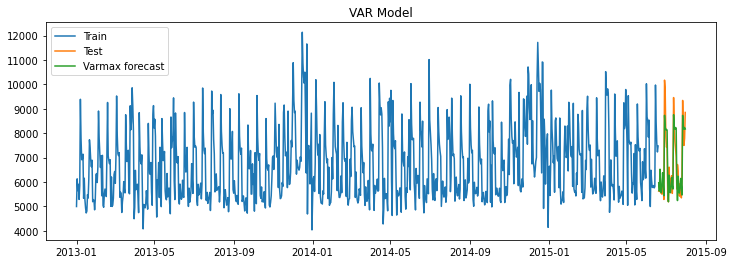

In [237]:
#sales plot
plt.figure(figsize=(12,4))
plt.plot(train_grouped_df['Sales'], label='Train')
plt.plot(test_grouped_df['Sales'], label='Test')
plt.plot(var_forecast['Sales'][test_grouped_df.index.min():], label='Varmax forecast')
plt.legend(loc='best')
plt.title('VAR Model')
plt.show()

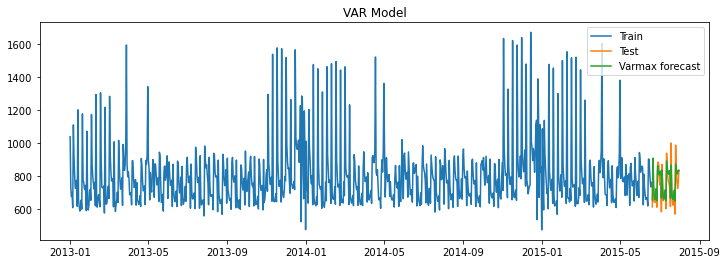

In [238]:
plt.figure(figsize=(12,4))
plt.plot(train_grouped_df['Customers'], label='Train')
plt.plot(test_grouped_df['Customers'], label='Test')
plt.plot(var_forecast['Customers'][test_grouped_df.index.min():], label='Varmax forecast')
plt.legend(loc='best')
plt.title('VAR Model')
plt.show()

In [239]:

#calculating errors
rmse = np.sqrt(mean_squared_error(test_grouped_df['Sales'], var_forecast['Sales'][test_grouped_df.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_grouped_df['Sales']-var_forecast['Sales'][test_grouped_df.index.min():])/test_grouped_df['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VAR'], 'RMSE': [rmse],'MAPE': [mape] })
result3 = tempResults[['Method', 'RMSE', 'MAPE']]
result3

,Method,RMSE,MAPE
0,VAR,611.9,6.64


In [240]:

#calculating errors
rmse_cust = np.sqrt(mean_squared_error(test_grouped_df['Customers'], var_forecast['Customers'][test_grouped_df.index.min():])).round(2)
mape_cust = np.round(np.mean(np.abs(test_grouped_df['Customers']-var_forecast['Customers'][test_grouped_df.index.min():])/test_grouped_df['Customers'])*100,2)

tempResults_cust = pd.DataFrame({'Method':['VAR'], 'RMSE': [rmse_cust],'MAPE': [mape_cust] })
result3_cust = tempResults_cust[['Method', 'RMSE', 'MAPE']]
result3_cust

,Method,RMSE,MAPE
0,VAR,56.79,6.44


# VARMAX

In [241]:
#varmax
exog = train_grouped_df[['Promo', 'Assortment_b', 'Assortment_c', 'StoreType_b','StoreType_c', 'StoreType_d',
                        'StateHoliday_a','StateHoliday_b', 'StateHoliday_c']]

mod = sm.tsa.VARMAX(train_grouped_df[['Sales', 'Customers']], order=(6,0), trend = 'n', exog = exog)
res = mod.fit(maxiter = 1000, disp=False)
res.summary()

Dep. Variable:,"['Sales', 'Customers']",No. Observations:,900
Model:,VARX(6),Log Likelihood,-12280.361
Date:,"Sun, 09 Apr 2023",AIC,24650.722
Time:,15:26:47,BIC,24866.830
Sample:,01-01-2013,HQIC,24733.277
,- 06-19-2015,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"66.73, 3.50",Jarque-Bera (JB):,"991.45, 3262.18"
Prob(Q):,"0.00, 0.06",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"1.85, 1.01",Skew:,"0.90, 1.75"
Prob(H) (two-sided):,"0.00, 0.92",Kurtosis:,"7.81, 11.64"


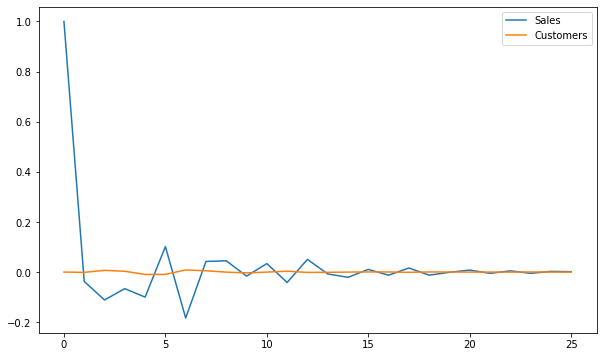

In [242]:
#impusle response factor
irf=res.impulse_responses(steps=25, orthogonalized=False)
irf.plot(figsize=(10,6))
plt.show()

In [243]:
#training the model
start_index = test_grouped_df.index.min()
end_index = test_grouped_df.index.max()

predictions = mod.fit().predict(start = start_index, end = end_index, 
            exog = test_grouped_df[['Promo', 'Assortment_b', 'Assortment_c', 'StoreType_b','StoreType_c', 'StoreType_d',
                        'StateHoliday_a','StateHoliday_b', 'StateHoliday_c']])

In [244]:
predictions.shape

(42, 2)

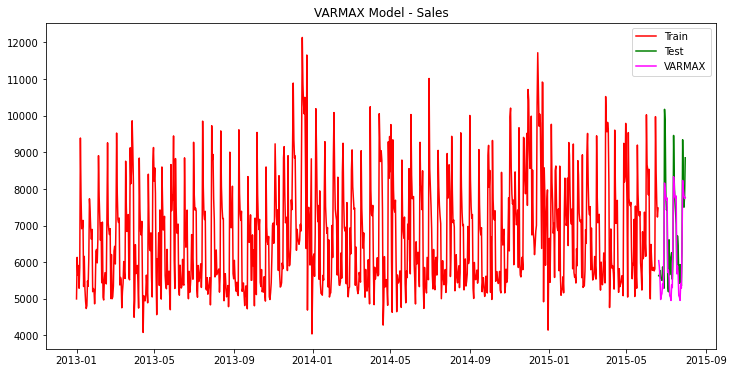

In [245]:
# pred plot
plt.figure(figsize=(12,6)) 
plt.plot( train_grouped_df['Sales'], label='Train', color='r')
plt.plot(test_grouped_df['Sales'], label='Test', color='g')
plt.plot(predictions['Sales'], label='VARMAX', color='magenta')
plt.legend(loc='best')
plt.title('VARMAX Model - Sales')
plt.show()

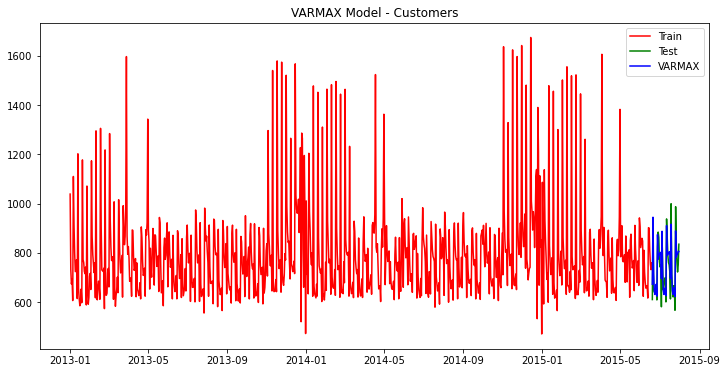

In [246]:
#pred plot
plt.figure(figsize=(12,6)) 
plt.plot( train_grouped_df['Customers'], label='Train', color='r')
plt.plot(test_grouped_df['Customers'], label='Test', color='g')
plt.plot(predictions['Customers'], label='VARMAX', color='blue')
plt.legend(loc='best')
plt.title('VARMAX Model - Customers')
plt.show()

In [247]:
#calculating errors

rmse = np.sqrt(mean_squared_error(test_grouped_df['Sales'], predictions['Sales'][test_grouped_df.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test_grouped_df['Sales']-predictions['Sales'][test_grouped_df.index.min():])/test_grouped_df['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['VARMAX method'], 'RMSE': [rmse],'MAPE': [mape] })
result4 = tempResults[['Method', 'RMSE', 'MAPE']]
result4

,Method,RMSE,MAPE
0,VARMAX method,738.88,8.56


In [248]:
#calculating errors
rmse_cust = np.sqrt(mean_squared_error(test_grouped_df['Customers'], predictions['Customers'][test_grouped_df.index.min():])).round(2)
mape_cust = np.round(np.mean(np.abs(test_grouped_df['Customers']-predictions['Customers'][test_grouped_df.index.min():])/test_grouped_df['Customers'])*100,2)

tempResults_cust = pd.DataFrame({'Method':['VARMAX method'], 'RMSE': [rmse_cust],'MAPE': [mape_cust] })
result4_cust = tempResults_cust[['Method', 'RMSE', 'MAPE']]
result4_cust

,Method,RMSE,MAPE
0,VARMAX method,52.1,5.73


In [249]:
#calculating errors
resu_sales = pd.concat([result1, result2, result3, result4])
resu_sales = resu_sales.sort_values(by=['RMSE','MAPE'], ascending=True)
resu_sales = resu_sales.set_index('Method')


styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "140%"),
                              ("color", 'red')])]

resu_sales = resu_sales.style.set_caption("Sales RMSE & MAPE Table").set_table_styles(styles)
resu_sales

,RMSE,MAPE
Method,,
VAR,611.900000,6.640000
VARMAX method,738.880000,8.560000
ARIMA method,6726.880000,98.620000
SARIMA method,9598.680000,143.450000


In [250]:
#calculating errors
resu_cust = pd.concat([result1_cust, result2_cust, result3_cust, result4_cust])
resu_cust = resu_cust.sort_values(by=['MAPE','RMSE'], ascending=True)
resu_cust = resu_cust.set_index('Method')

styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "140%"),
                              ("color", 'green')])]

resu_cust = resu_cust.style.set_caption("Customer RMSE & MAPE Table").set_table_styles(styles)
resu_cust

,RMSE,MAPE
Method,,
VARMAX method,52.100000,5.730000
VAR,56.790000,6.440000
ARIMA method,705.070000,85.740000
SARIMA method,3561.190000,488.070000


# Pre-Forecasted Summary:-

The best model for the given problem (Sales Forecasting) is found to be **`VAR[Vector Auto-regressive Model]`**  as it is giving the lowest **RMSE** and lowest **MAPE** by which we can conclude that the predictions made by **VAR model** is acceptable w.r.t. other models. The model accuracy can be seen as follows:- 

**`RMSE:- 611.90`**

**`MAPE:- 6.64`**

# Forecasting for next 6-weeks

In [251]:
# getting further indexes for forecast 
desired_range = pd.date_range(start="2015-08-01",end="2015-09-11")
dates = pd.DataFrame({'Date':desired_range, 'Unnamed: 1':np.nan})
dates = dates.set_index('Date')
dates.head()

,Unnamed: 1
Date,
2015-08-01,NaN
2015-08-02,NaN
2015-08-03,NaN
2015-08-04,NaN
2015-08-05,NaN


In [252]:
dates.shape

(42, 1)

In [253]:
train_grouped_df.shape

(900, 17)

In [254]:
#defining train len
train_len = 942
train_final = trainy[:train_len] 
print(train_final.shape)

(942, 17)


In [255]:
#cal model val
exog = train_final[['Promo', 'Assortment_b', 'Assortment_c', 'StoreType_b','StoreType_c', 'StoreType_d',
                        'StateHoliday_a','StateHoliday_b', 'StateHoliday_c']].astype(float)
endog = train_final[['Sales', 'Customers']].astype(float)
var_model = sm.tsa.VAR(endog,exog)
res = var_model.select_order(maxlags=15)
print(res.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        20.43       20.54   7.465e+08       20.47
1        20.17       20.29   5.749e+08       20.22
2        20.17       20.32   5.757e+08       20.23
3        20.15       20.32   5.660e+08       20.22
4        20.15       20.33   5.619e+08       20.22
5        20.10       20.31   5.357e+08       20.18
6        19.99       20.22   4.825e+08       20.08
7        19.98       20.23   4.742e+08       20.07
8        19.96       20.23   4.663e+08       20.06
9        19.92       20.21   4.468e+08       20.03
10       19.83       20.14   4.081e+08       19.95
11       19.74       20.07   3.743e+08       19.87
12       19.72       20.07   3.665e+08       19.85
13       19.70       20.08   3.600e+08       19.84
14       19.67       20.06   3.476e+08       19.82
15      19.62*      20.04*  3.324e+08*      19.78*
-------------------------------

In [256]:
#model fit
var_model_final = var_model.fit(14)
var_model_final.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, Apr, 2023
Time:                     15:27:18
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    20.0615
Nobs:                     928.000    HQIC:                   19.8167
Log likelihood:          -11682.4    FPE:                3.47340e+08
AIC:                      19.6657    Det(Omega_mle):     3.20551e+08
--------------------------------------------------------------------
Results for equation Sales
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const               3739.389536      3273.361320            1.142           0.253
Promo                  1.787655         0.097086           18.413           0.000
Assortment_b       -6099.351227      1750.813455        

In [257]:
#getting the lag order
lag_order = var_model_final.k_ar
print(lag_order) 
forecast_input = train_final[['Sales','Customers']].values[-lag_order:]
forecast_input

14


array([[5715.36832579,  612.96470588],
       [6719.52      ,  999.32      ],
       [6453.58598726,  715.27479527],
       [5645.15927602,  646.30045249],
       [5424.39457014,  621.03800905],
       [5933.15851449,  666.62047101],
       [5850.71622847,  657.65457842],
       [5352.43812105,  566.91056911],
       [6417.68      ,  987.28      ],
       [9343.62511542,  835.63434903],
       [8048.98907104,  764.46903461],
       [7501.45677889,  722.15741583],
       [7791.86648501,  751.1044505 ],
       [8851.50505051,  835.05601469]])

In [258]:
# forecast
exog_test = test_grouped_df[['Promo', 'Assortment_b', 'Assortment_c', 'StoreType_b','StoreType_c', 'StoreType_d',
                        'StateHoliday_a','StateHoliday_b', 'StateHoliday_c']].astype(float)
fc = var_model_final.forecast(y = forecast_input, steps = 42, exog_future = exog_test)
var_forecast = pd.DataFrame(fc, index = dates.index, columns = ['Sales','Customers'])

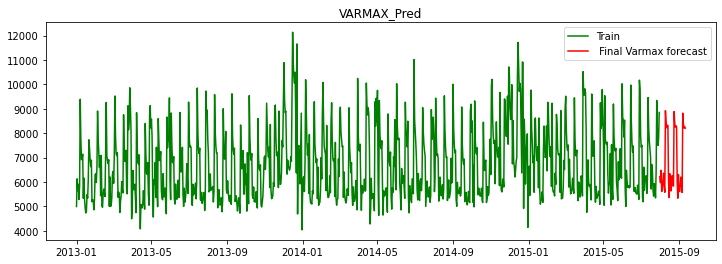

In [259]:
#forecast plot
plt.figure(figsize=(12,4))
plt.plot(train_final['Sales'], label='Train', color='green')
plt.plot(var_forecast['Sales'][dates.index.min():], label=' Final Varmax forecast', color='red')
plt.legend(loc='best')
plt.title('VARMAX_Pred')
plt.show()

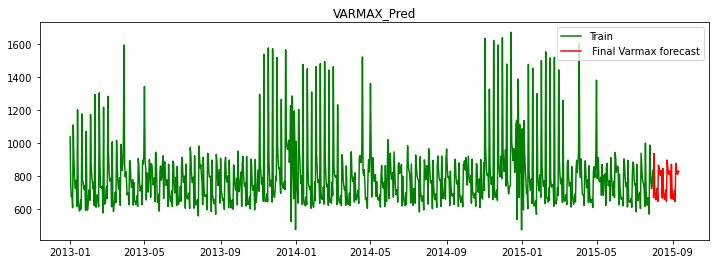

In [260]:
#forecast plot
plt.figure(figsize=(12,4))
plt.plot(train_final['Customers'], label='Train', color='green')
plt.plot(var_forecast['Customers'][dates.index.min():], label=' Final Varmax forecast', color='red')
plt.legend(loc='best')
plt.title('VARMAX_Pred')
plt.show()

In [261]:
#Actual forecast for 6 weeks
var_forecast.head(15)

,Sales,Customers
Date,,
2015-08-01,6224.813989,668.418830
2015-08-02,5974.660786,935.514329
2015-08-03,6481.768138,735.588123
2015-08-04,5614.886360,660.414499
2015-08-05,5681.320506,653.933050
2015-08-06,6035.149644,689.338079
2015-08-07,6363.813522,723.502345
2015-08-08,5873.968752,643.888556
2015-08-09,5582.898039,865.001094


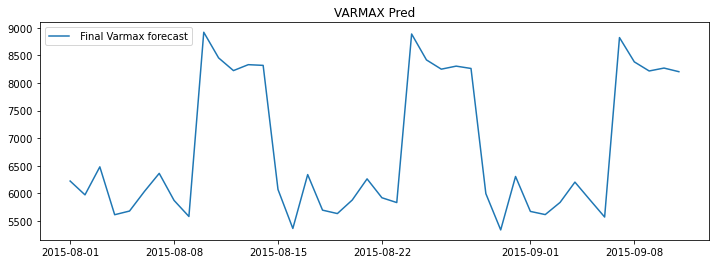

In [262]:
#sales predicted forecast plot
plt.figure(figsize=(12,4))
plt.plot(var_forecast['Sales'][dates.index.min():], label=' Final Varmax forecast')
plt.legend(loc='best')
plt.title('VARMAX Pred')
plt.show()

# Summary (After Forecasting):-


> As we have already observed that the best model for the given problem (Sales Forecasting) is found to be **`VAR[Vector Auto-regressive Model]`**  as it is giving the lowest **RMSE** and  **MAPE**.
Taking this train of thought further we made predictions for next 6 weeks after the data concluded.

## As we can see that the predicted data not only coincides with the data provided but also captures the features of the previous data.

- There is a clearly visible seasonality present in the predicted data which changes weekly.
- There is an everpresent linearity througout the data which is also visible in the predictions.
- The model was able to accurately match the flow of trend that was present in the training data without overfitting.

observing the performance by the model we can conclude that for the problem at hand, the predictions made by **VAR model** are acceptable w.r.t. other models.
